##  Imports

In [1]:
%load_ext autoreload
%autoreload 2

# Pandas and numpy for data manipulation
%matplotlib inline
import pandas as pd
import numpy as np

# Matplotlib  for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dimensionality reduction
from sklearn.decomposition import PCA

# Model selection
from sklearn.model_selection import train_test_split

# Data pre-processing
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

## Load data

In [3]:
df = pd.read_csv('../raw_data/clean_data.csv')
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,FATAL,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,January,Monday,9.0,0,2.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1992.0,1.0,F,33.0,Driver,Injury,Safety device used,Motor Vehicle Driver,2890
1,1999,January,Monday,9.0,0,2.0,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1992.0,1.0,F,70.0,Driver,No Injury,Safety device used,Motor Vehicle Driver,2890
2,1999,January,Monday,20.0,0,1.0,Ran off left shoulder,Intersection with parking lot entrance,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1988.0,1.0,F,38.0,Driver,Injury,Safety device used,Motor Vehicle Driver,4332
3,1999,January,Monday,5.0,0,2.0,Hit a moving object,At an intersection,Raining,Wet,...,Other trucks and vans,1995.0,1.0,M,34.0,Driver,No Injury,Safety device used,Motor Vehicle Driver,5053
4,1999,January,Monday,5.0,0,2.0,Hit a moving object,At an intersection,Raining,Wet,...,Other trucks and vans,1995.0,2.0,M,30.0,"Front row, right outboard",No Injury,Safety device used,Motor Vehicle Passenger,5053


In [4]:
df.shape

(3817613, 23)

In [5]:
# Shuffle data
df = df.sample(frac = 1).reset_index(drop = True)

## Feature matrix

In [6]:
# Feature matrix and class variable
X, y = df.drop(['FATAL'], axis = 1), df['FATAL']

##  Feature scaling

In [7]:
# List of categorical attributes
cat_subset = list(X.select_dtypes('O'))

# List of numerical attributes
num_subset = list(X.select_dtypes('number'))

# Binarize the categorical attributes
cat_attribs = [([cat], LabelBinarizer()) for cat in cat_subset]

# Standardize the numerical attributes
num_attribs = [([num], StandardScaler()) for num in num_subset]

# Build a dataframe mapper pipeline
mapper = DataFrameMapper(cat_attribs + num_attribs)

# Fit transform the dataset
X_scaled = mapper.fit_transform(X)

In [8]:
# Size of the data after pre-processing
print('Dataset size after pre-processing:', X_scaled.shape)

Dataset size after pre-processing: (3817613, 133)


In [9]:
# Relabel the class variable
y = y.map({0:'Non-fatal', 1: 'Fatal'})

## Principal component analysis

In [10]:
# PCA for visualization
pca = PCA(n_components = 2)
X_reduced_pca = pca.fit_transform(X_scaled)

In [11]:
# Put in dataframe
X_reduced_pca = pd.DataFrame(data = X_reduced_pca)
X_reduced_pca.columns = ['PC1', 'PC2']
X_reduced_pca['Class'] = y
X_reduced_pca.head()

,PC1,PC2,Class
0,-0.015250,-0.739897,Non-fatal
1,-2.248574,0.349301,Non-fatal
2,2.115575,0.156556,Non-fatal
3,-1.564176,-0.662320,Non-fatal
4,-2.510922,-1.406142,Non-fatal


In [12]:
# Pickle
X_reduced_pca.to_pickle('../data/pca.pkl')

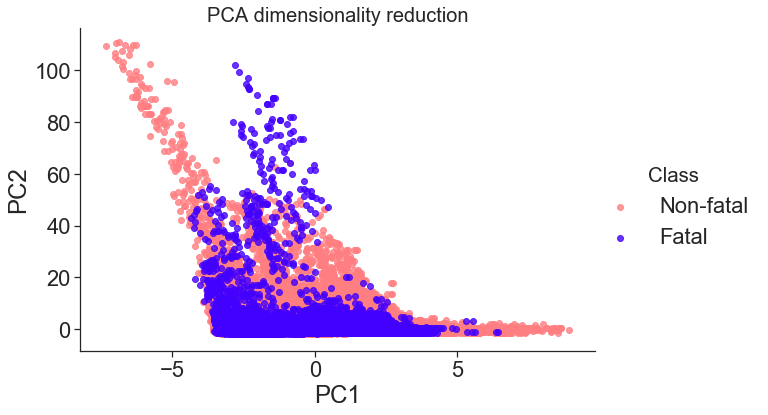

In [13]:
# Plot
sns.set(font_scale = 2)
sns.set_style('ticks')

sns.lmplot(data = X_reduced_pca, x = 'PC1', y = 'PC2', hue = 'Class', fit_reg = False, 
           height = 6, aspect = 1.5, palette = 'gnuplot2_r')
plt.title('PCA dimensionality reduction', fontsize = 20)
plt.savefig('../image/pca.png')